# Notebook 1: Projektkontext & Datenaufbereitung

In diesem Notebook wird der Grundstein für die spätere Modellierung gelegt. Der Fokus liegt auf dem Verständnis des Anwendungskontexts, der strukturierten Aufbereitung der Daten sowie ersten sinnvollen Transformationen.

## Gliederung

### 1. Einleitung und Projektkontext
- Zieldefinition
- Projektübersicht
- Datenbeschreibung

### 2. Importe und Daten laden
- Importieren der benötigten Bibliotheken
- Daten laden und erster Überblick

### 3. Datenaufbereitung
- Feature-Selektion im Anwendungskontext
- Behandlung fehlender Werte
- Age-Feature erstellen

### 4. Abschluss
- Speicherung des aufbereiteten Datensatzes


## Einleitung und Projektkontext
### Zieldefinition
Ziel dieses Projekts ist es, ein Regressionsmodell zu entwickeln, das den Marktwert eines Gebrauchtwagens anhand verschiedener Fahrzeug- und Angebotsmerkmale vorhersagen kann.  
Die Analyse basiert auf Gebrauchtwagendaten aus Indien und orientiert sich an einem realistischen Anwendungsszenario: Eine Privatperson möchte den ungefähren Wert ihres Fahrzeugs einschätzen.  
Bei der Modellierung wird berücksichtigt, dass nicht alle im Datensatz enthaltenen Informationen einer Privatperson zum Zeitpunkt der Nutzung des Modells zur Verfügung stehen würden.  
Aus diesem Grund werden bestimmte Features im weiteren Verlauf der Analyse kritisch geprüft und gegebenenfalls ausgeschlossen, um ein praxisnahes und realistisches Modell zu entwickeln.


### Projektübersicht
Das Gesamtprojekt ist in mehrere Notebooks unterteilt, um die einzelnen
Analyse- und Modellierungsschritte klar voneinander zu trennen:

- **Notebook 1:** Projektkontext, Zieldefinition, Datenbereinigung,
  Behandlung fehlender Werte, erste Feature-Transformationen sowie
  Speicherung des aufbereiteten Datensatzes

- **Notebook 2:** Explorative Datenanalyse (univariate, bivariate und
  multivariate Analysen)

- **Notebook 3:** Modellierung mit klassischen Regressionsverfahren
  (Lineare Regression, Ridge) inklusive Feature Engineering

- **Notebook 4:** Einsatz eines leistungsstarken Modells (CatBoost) mit
  Fokus auf möglichst hohe Vorhersagegenauigkeit

## Datenbeschreibung
Der Datensatz enthält Gebrauchtwagenangebote aus Indien und umfasst sowohl Fahrzeugmerkmale als auch angebotsbezogene Informationen.

Die enthaltenen Features lassen sich grob in folgende Kategorien einteilen:

- **Fahrzeugmerkmale:** z. B. Hersteller, Modell, Herstellungsjahr, Kilometerstand, Kraftstoffart,
  Getriebe, Karosserietyp
- **Standortbezogene Informationen:** z. B. Stadt und Bundesstaat der
  Registrierung
- **Angebotsmerkmale:** z. B. Anzahl der Aufrufe, Angebotsquelle,
  Verfügbarkeitsstatus
- **Preisbezogene Variablen:** Verkaufspreis, Neupreis

Eine detaillierte Auflistung und Beschreibung aller Features ist im Projekt-README zu finden.

## Importe und Daten laden
### Importieren der benötigten Bibliotheken

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from prettytable import PrettyTable

%config InlineBackend.figure_format = 'retina'
plt.style.use('seaborn-whitegrid')
plt.rc('figure', autolayout = True, dpi = 110)
plt.rc('axes', labelweight = 'bold', titlesize = 14, titleweight = 'bold')
plt.rc('font', size = 11)

warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/used-car-price-prediction/Used_Car_Price_Prediction.csv


/tmp/ipykernel_38/1327237928.py:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


### Daten laden und erster Überblick

In [2]:
df = pd.read_csv('/kaggle/input/used-car-price-prediction/Used_Car_Price_Prediction.csv')
print(f'Anzahl Zeilen: {df.shape[0]}')
print(f'Anzahl Spalten: {df.shape[1]}')
df.head()

Number of Rows: 7400
Numer of Columns: 29


,car_name,yr_mfr,fuel_type,kms_run,sale_price,city,times_viewed,body_type,transmission,variant,assured_buy,registered_city,registered_state,is_hot,rto,source,make,model,car_availability,total_owners,broker_quote,original_price,car_rating,ad_created_on,fitness_certificate,emi_starts_from,booking_down_pymnt,reserved,warranty_avail
0,maruti swift,2015,petrol,8063,386399,noida,18715,hatchback,manual,lxi opt,True,delhi,delhi,True,dl6c,inperson_sale,maruti,swift,in_stock,2,397677,404177.0,great,2021-04-04T07:09:18.583,True,8975,57960,False,False
1,maruti alto 800,2016,petrol,23104,265499,noida,2676,hatchback,manual,lxi,True,noida,uttar pradesh,True,up16,inperson_sale,maruti,alto 800,in_stock,1,272935,354313.0,great,2021-03-22T14:07:32.833,True,6167,39825,False,False
2,hyundai grand i10,2017,petrol,23402,477699,noida,609,hatchback,manual,sports 1.2 vtvt,True,agra,uttar pradesh,True,up80,inperson_sale,hyundai,grand i10,in_stock,1,469605,NaN,great,2021-03-20T05:36:31.311,True,11096,71655,False,False
3,maruti swift,2013,diesel,39124,307999,noida,6511,hatchback,manual,vdi,True,delhi,delhi,True,dl1c,inperson_sale,maruti,swift,in_stock,1,294262,374326.0,great,2021-01-21T12:59:19.299,True,7154,46200,False,False
4,hyundai grand i10,2015,petrol,22116,361499,noida,3225,hatchback,manual,magna 1.2 vtvt,False,new delhi,delhi,True,dl12,inperson_sale,hyundai,grand i10,in_stock,1,360716,367216.0,great,2021-04-01T13:33:40.733,True,8397,54225,False,False


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7400 entries, 0 to 7399
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   car_name             7400 non-null   object 
 1   yr_mfr               7400 non-null   int64  
 2   fuel_type            7400 non-null   object 
 3   kms_run              7400 non-null   int64  
 4   sale_price           7400 non-null   int64  
 5   city                 7400 non-null   object 
 6   body_type            7319 non-null   object 
 7   transmission         6931 non-null   object 
 8   variant              7400 non-null   object 
 9   registered_city      7390 non-null   object 
 10  registered_state     7390 non-null   object 
 11  rto                  7400 non-null   object 
 12  make                 7400 non-null   object 
 13  model                7400 non-null   object 
 14  total_owners         7400 non-null   int64  
 15  original_price       4120 non-null   f

## Datenaufbereitung
### Feature Selection im Anwendungskontext

Ein erster Blick auf die Daten zeigt, dass nicht alle enthaltenen Features für das definierte Anwendungsszenario relevant sind.

Da das Modell einer Privatperson eine erste Preiseinschätzung ermöglichen soll, stehen bestimmte Informationen zum Zeitpunkt der Nutzung nicht zur Verfügung oder sind eng mit dem Zielwert verknüpft. Solche Features würden zu einer unrealistischen Modellannahme oder zu Datenleckage führen und werden daher im weiteren Verlauf ausgeschlossen.

Dazu gehören unter anderem:
- **times_viewed:** nur relevant, wenn das Fahrzeug bereits online angeboten wird  
- **assured_buy:** Information liegt zum Nutzungszeitpunkt nicht vor  
- **is_hot:** analog zu `times_viewed`, basiert auf Angebotsdynamik  
- **source:** dem privaten Nutzer nicht bekannt  
- **car_availability:** für die Preiseinschätzung nicht relevant  
- **broker_quote:** stark mit dem Zielwert (`sale_price`) verknüpft  
- **emi_starts_from:** direkt vom Verkaufspreis abhängig  
- **booking_down_pymnt:** ebenfalls eng mit dem Verkaufspreis verknüpft  
- **reserved:** im betrachteten Anwendungskontext nicht verfügbar


In [3]:
#Verwerfen wir die eben genannten Features
df = df.drop(columns = 
             ['times_viewed', 'assured_buy', 'is_hot', 'source', 'car_availability',
             'broker_quote', 'emi_starts_from', 'booking_down_pymnt', 'reserved', 'ad_created_on'])

Car_rating ist ebenfalls ein feature, das entsteht, wenn es auf einer Seite angeboten wird. Allerdings werden wir es im Kontext dieser Analyse uminterpretieren, zur eigenen Einschätzung des Zustands des Gebrauchtwagens durch den Besitzer.

### Behandlung fehlender Werte

Im Folgenden werden fehlende Werte analysiert und behandlet. Ziel ist es einen Großteil der Daten zu erhalten, ohne unrealistische Verzerrungen zu erzeugen. Die folgende Funktion nutzt die Bibliothek PrettyTable, um ein DataFrame zu erzeugen, das uns für jedes Feature die absolute Anzahl der fehlenden Werte, sowie den realtiven Anteil anzeigt.
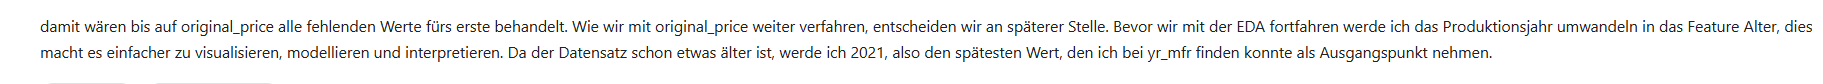

In [5]:
def get_missing(data):
    table = PrettyTable()
    table.field_names = ['Feature', 'Anzahl NaN', 'Anteil Nan']
    for col in data.columns:
        hasnull = data[col].isna()
        if hasnull.sum() > 0:
            count = hasnull.sum()
            perc = round(hasnull.mean(), 2)
            table.add_row([col, count, perc])
    return table

In [6]:
get_missing(df)

Feature,Anzahl NaN,Anteil Nan
body_type,103,0.01
transmission,556,0.08
registered_city,10,0.0
registered_state,10,0.0
original_price,3280,0.44
car_rating,9,0.0
fitness_certificate,8,0.0


Wenn es sich um das gleiche Auto handelt, sollte auch transmission und body_type gleich sein.
Versuchen wir zunächst Informationen zu erhalten, indem wir fehlende Werte durch Logik auffüllen. Wenn es sich um das gleiche Auto handelt, dann sollten auch die Features **transmission** und **body-type** gleich sein. Um gleiche Autos zu bestimmen, wir Variant benutzt, da dies die Autos am feinsten unterteilt und Fehler somit unwahrscheinlicher macht.

In [17]:
for col in ['transmission', 'body_type']:
    df[col] = df.groupby('variant')[col].transform(
        lambda s: s.fillna(s.mode().iat[0]) if not s.mode().empty else s
    )


In [8]:
get_missing(df)

Feature,Anzahl NaN,Anteil Nan
body_type,81,0.01
transmission,469,0.06
registered_city,10,0.0
registered_state,10,0.0
original_price,3280,0.44
car_rating,9,0.0
fitness_certificate,8,0.0


Wir konnten die fehlenden Werte bereits etwas reduzieren. Für die restlichen fehlenden Werte von body_type, transmission, registered_city, registered_state, legen wir eine neue Kategorie **missing** an. Da für fitness_certificate nur 8 Werte fehlen und dieses Feature fast immer True ist, werde ich hier einfach den Modus einfüllen.

In [15]:
df['body_type'] = df['body_type'].fillna('missing')
df['transmission'] = df['transmission'].fillna('missing')
df['registered_city'] = df['registered_city'].fillna('missing')
df['registered_state'] = df['registered_state'].fillna('missing')
df['fitness_certificate'] = df['fitness_certificate'].fillna(df['fitness_certificate'].mode()[0])

In [16]:
get_missing(df)

Feature,Anzahl NaN,Anteil Nan
original_price,3280,0.44
car_rating,9,0.0


Bis auf **original_price** und **car_rating** wären damit alle fehlenden Werte behandelt. Im Folgenden werden die restlichen 9 Zeilen, bei denen car_rating fehlt verworfen. Das Feature original_price weist einen hohen Anteil fehlender Werte auf und wird daher zu einem späteren Zeitpunkt im Rahmen der explorativen Datenanalyse gesondert betrachtet.

In [ ]:
df = df[df['car_rating'].notna()]

#### Age-Feature erstellen
Bevor wir mit der EDA fortfahren werde ich das Produktionsjahr umwandeln in das Feature Alter, dies macht es einfacher zu visualisieren, modellieren und interpretieren. Da der Datensatz schon etwas älter ist, werde ich den spätesten Wert in yr_mfr als Ausgangspunkt nehmen.

In [18]:
reference_year = df['yr_mfr'].max()
df['age'] = reference_year - df['yr_mfr']
df.drop(columns = 'yr_mfr', inplace = True)

#### Speichern der aufbereiteten Datensatzes

In [ ]:
df.to_csv("/kaggle/working/cleaned_data_01.csv", index=False)